In [21]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate

sns.set_theme(style="ticks")

In [2]:
host = "localhost"
user = "root"
pw = ''
db = 'appartments'

# Loading data from database

In [3]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        # print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [4]:
connection = create_db_connection(host, user, pw, db)

q1 = """
SELECT *
FROM property;
"""

results = read_query(connection, q1)

from_db = []

for result in results:
    result = list(result)
    from_db.append(result)

columns = ['id', 'rooms', 'district', 'floor', 'floors_in_house', 'floor_relation', 
           'area', 'area_living', 'area_kitchen', 'price']
           
df = pd.DataFrame(from_db, columns=columns)
df.set_index('id', inplace=True)

MySQL Database connection successful


In [5]:
df.head()

,rooms,district,floor,floors_in_house,floor_relation,area,area_living,area_kitchen,price
id,,,,,,,,,
3,2,Орджоникидзевский,2,16,0.066667,72.0,33.0,14.0,6200
4,2,,2,2,1.000000,45.0,31.0,6.0,500
5,2,Ленинский,1,2,0.000000,68.5,45.0,15.0,3330
6,2,Правобережный,5,5,1.000000,46.0,29.0,6.0,3250
7,3,Правобережный,4,5,0.750000,60.2,48.0,6.0,3850


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 3 to 488
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            486 non-null    int64  
 1   district         486 non-null    object 
 2   floor            486 non-null    int64  
 3   floors_in_house  486 non-null    int64  
 4   floor_relation   486 non-null    float64
 5   area             486 non-null    float64
 6   area_living      486 non-null    float64
 7   area_kitchen     486 non-null    float64
 8   price            486 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 38.0+ KB


In [7]:
df.describe()

,rooms,floor,floors_in_house,floor_relation,area,area_living,area_kitchen,price
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.078189,3.685185,6.366255,0.509937,54.826543,30.609753,8.526893,3380.944444
std,0.845886,2.547217,3.412774,0.372622,33.353265,16.435042,4.133917,1440.874858
min,1.000000,1.000000,2.000000,0.000000,14.100000,0.000000,0.000000,470.000000
25%,1.000000,2.000000,4.000000,0.222222,41.000000,18.000000,6.000000,2350.000000
50%,2.000000,3.000000,5.000000,0.500000,50.000000,30.000000,8.000000,3200.000000
75%,3.000000,5.000000,9.000000,0.888889,65.000000,42.000000,9.000000,4018.750000
max,4.000000,14.000000,17.000000,1.000000,519.000000,110.000000,35.500000,10000.000000


# EDA

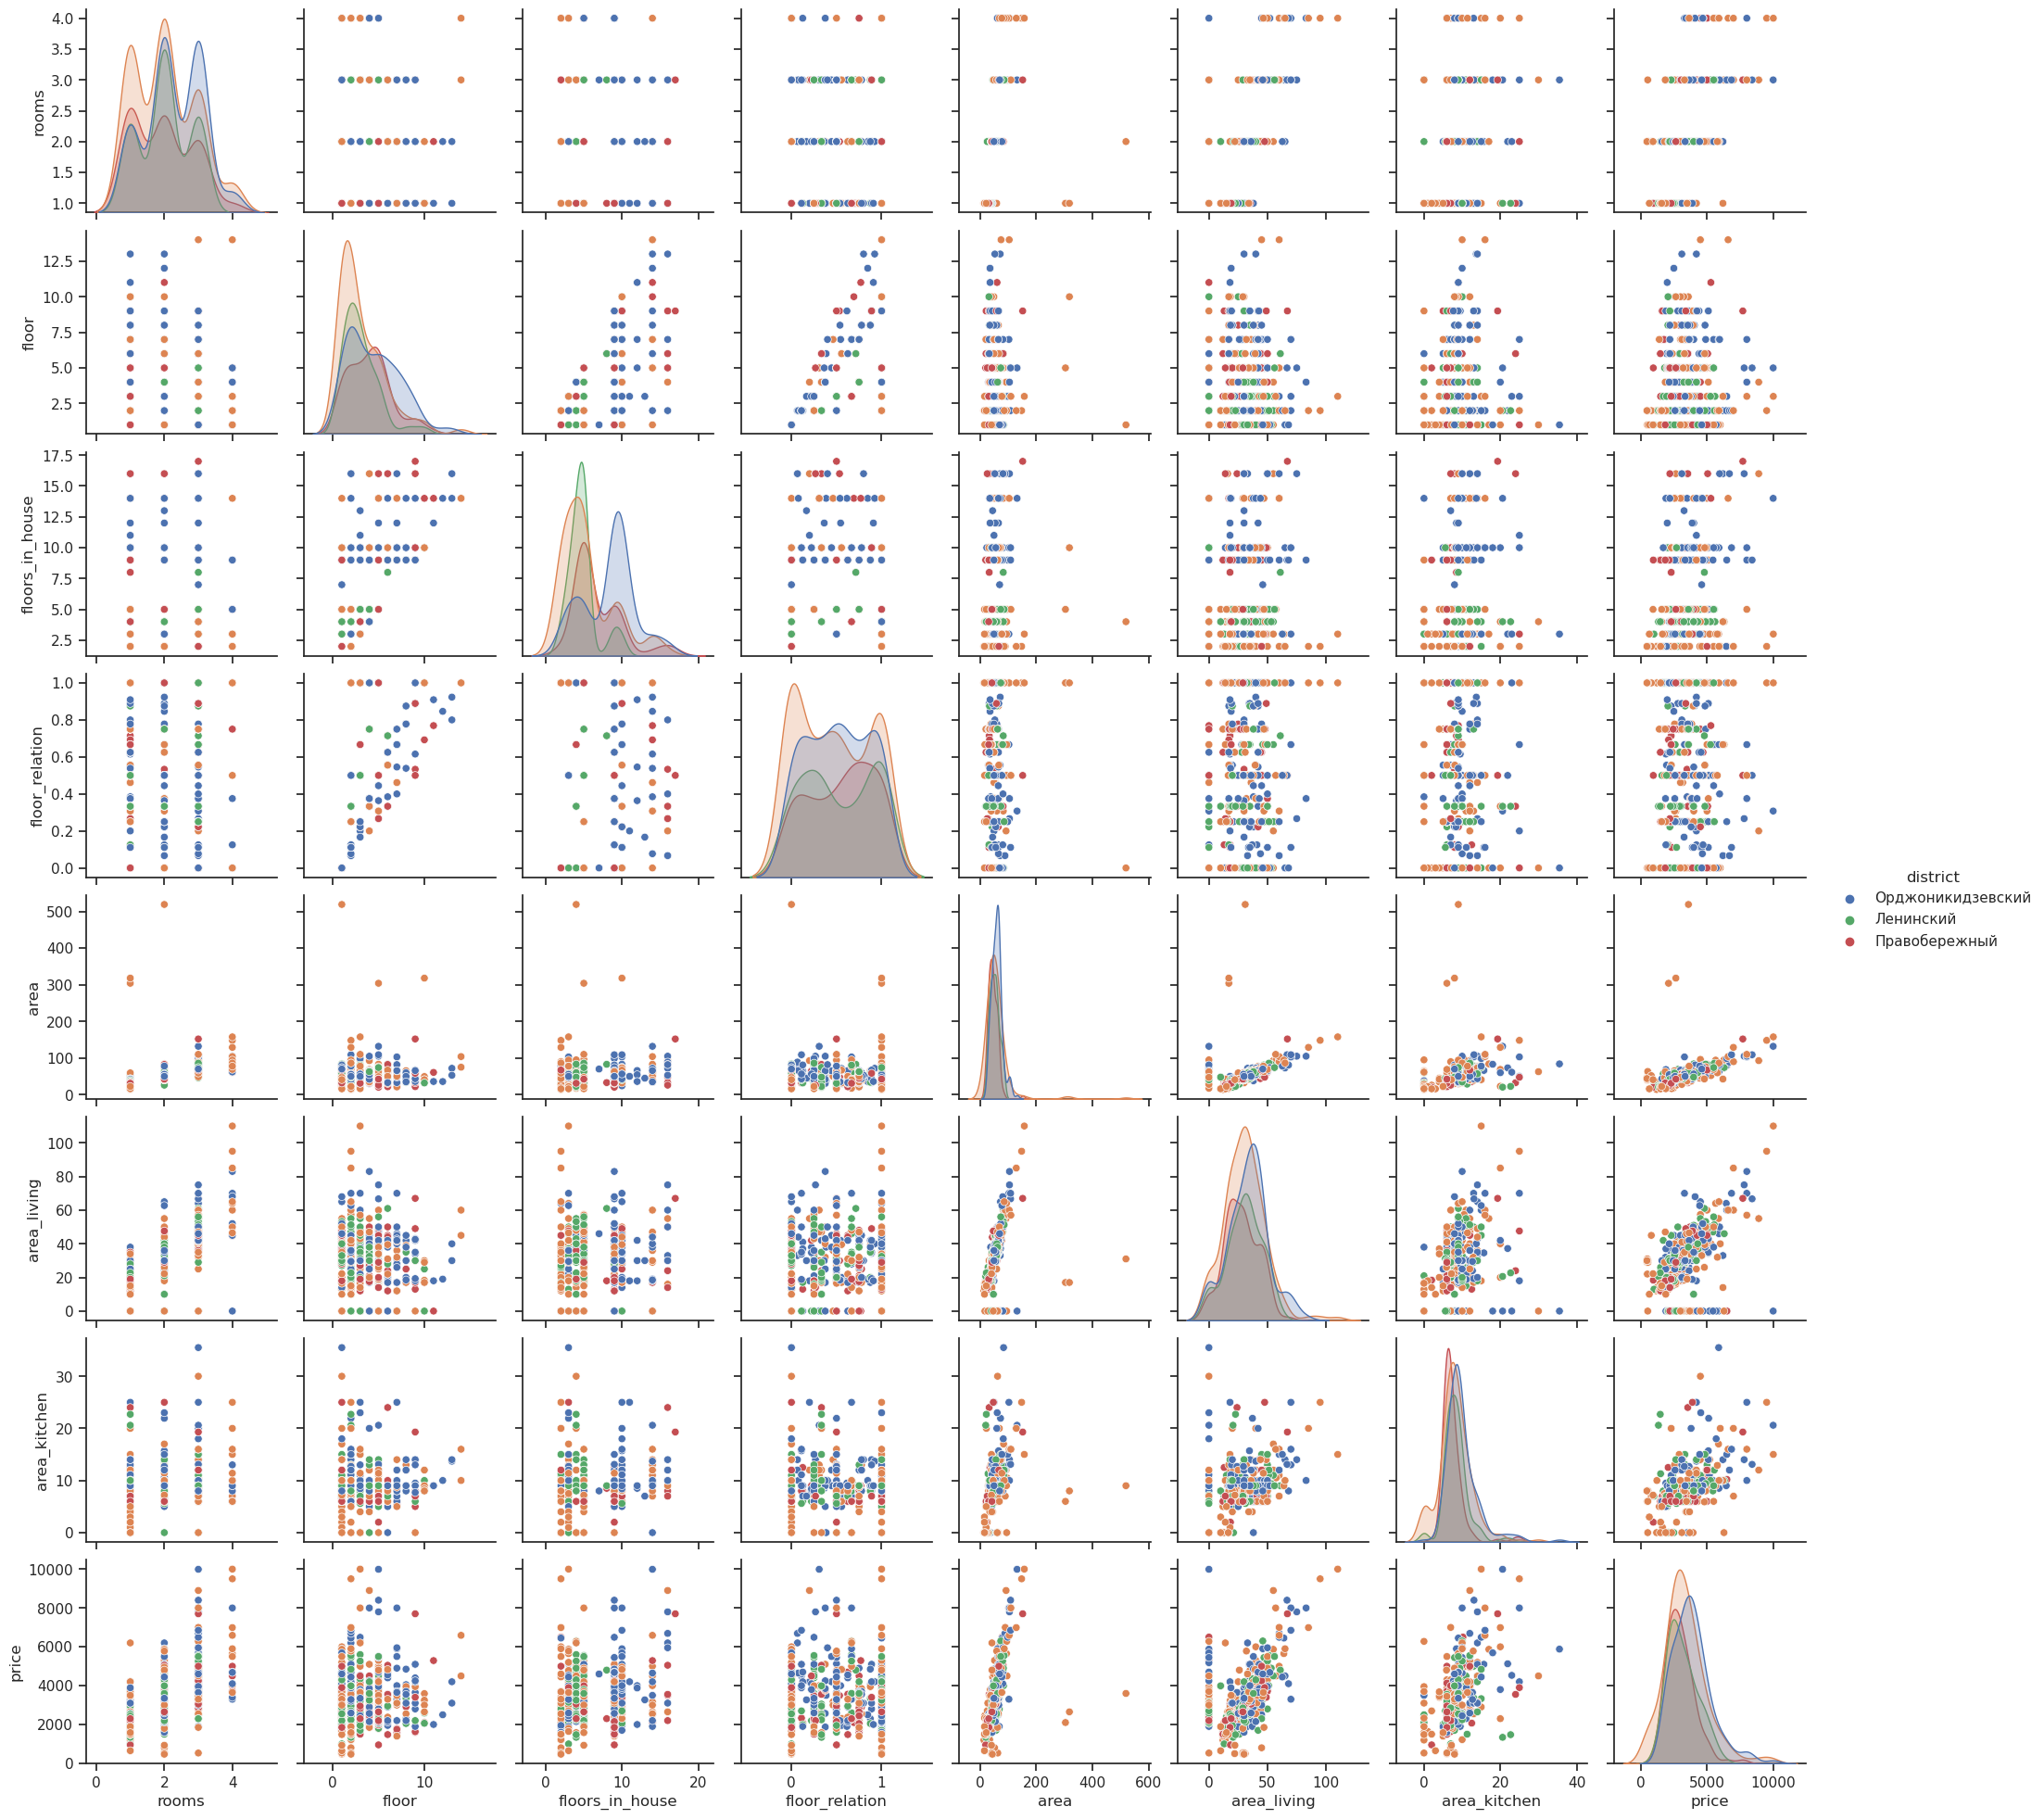

In [8]:
sns.pairplot(df[columns[1:]], hue='district')

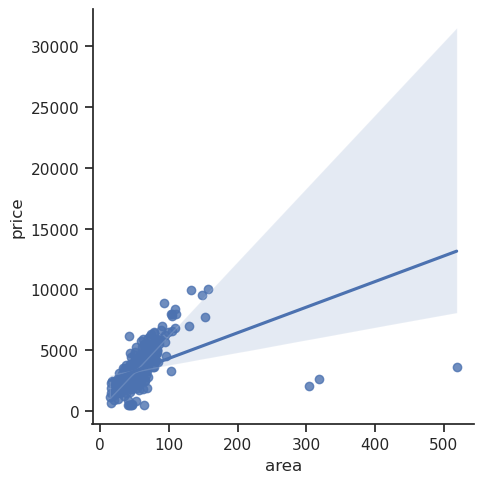

In [9]:
sns.lmplot(x='area', y='price', data=df[columns[1:]])

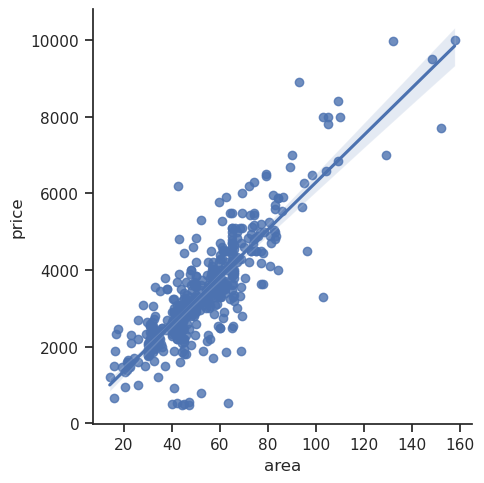

In [10]:
df.loc[df.area > 200, 'area'] = df[df.area > 200].area /  10

sns.lmplot(x='area', y='price', data=df[columns[1:]])

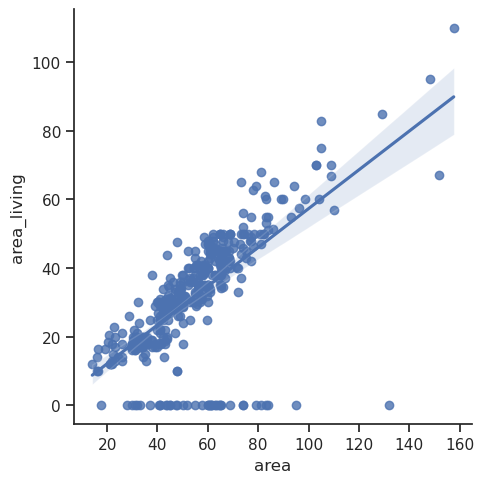

In [11]:
sns.lmplot(x='area', y='area_living', data=df[columns[1:]])

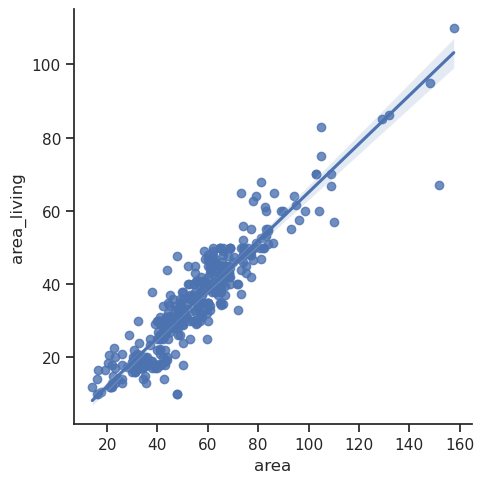

In [12]:
ind = df.loc[df.area_living == 0].index

x = df[df.area_living > 0].area.to_numpy().reshape((-1, 1))
y = df[df.area_living > 0].area_living

model = LinearRegression()
model.fit(x, y)

df.loc[ind, 'area_living'] = model.predict(df.loc[ind, 'area'].to_numpy().reshape(-1, 1))

sns.lmplot(x='area', y='area_living', data=df[columns[1:]])

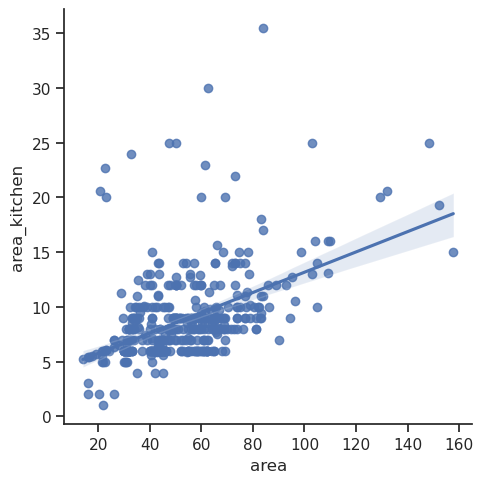

In [13]:
ind = df.loc[df.area_kitchen == 0].index

x = df[df.area_kitchen > 0].area.to_numpy().reshape((-1, 1))
y = df[df.area_kitchen > 0].area_kitchen

model = LinearRegression()
model.fit(x, y)

df.loc[ind, 'area_kitchen'] = model.predict(df.loc[ind, 'area'].to_numpy().reshape(-1, 1))

sns.lmplot(x='area', y='area_kitchen', data=df[columns[1:]])

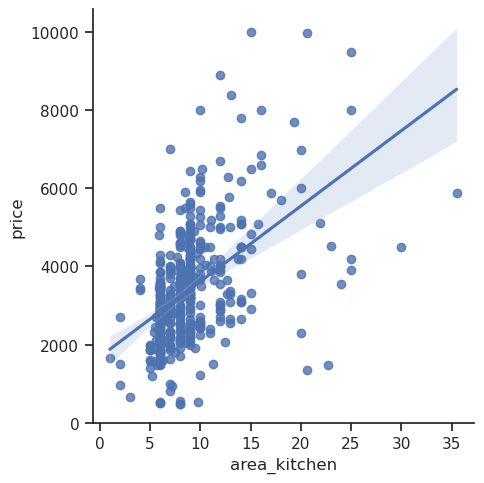

In [20]:
sns.lmplot(x='area_kitchen', y='price', data=df[columns[1:]])

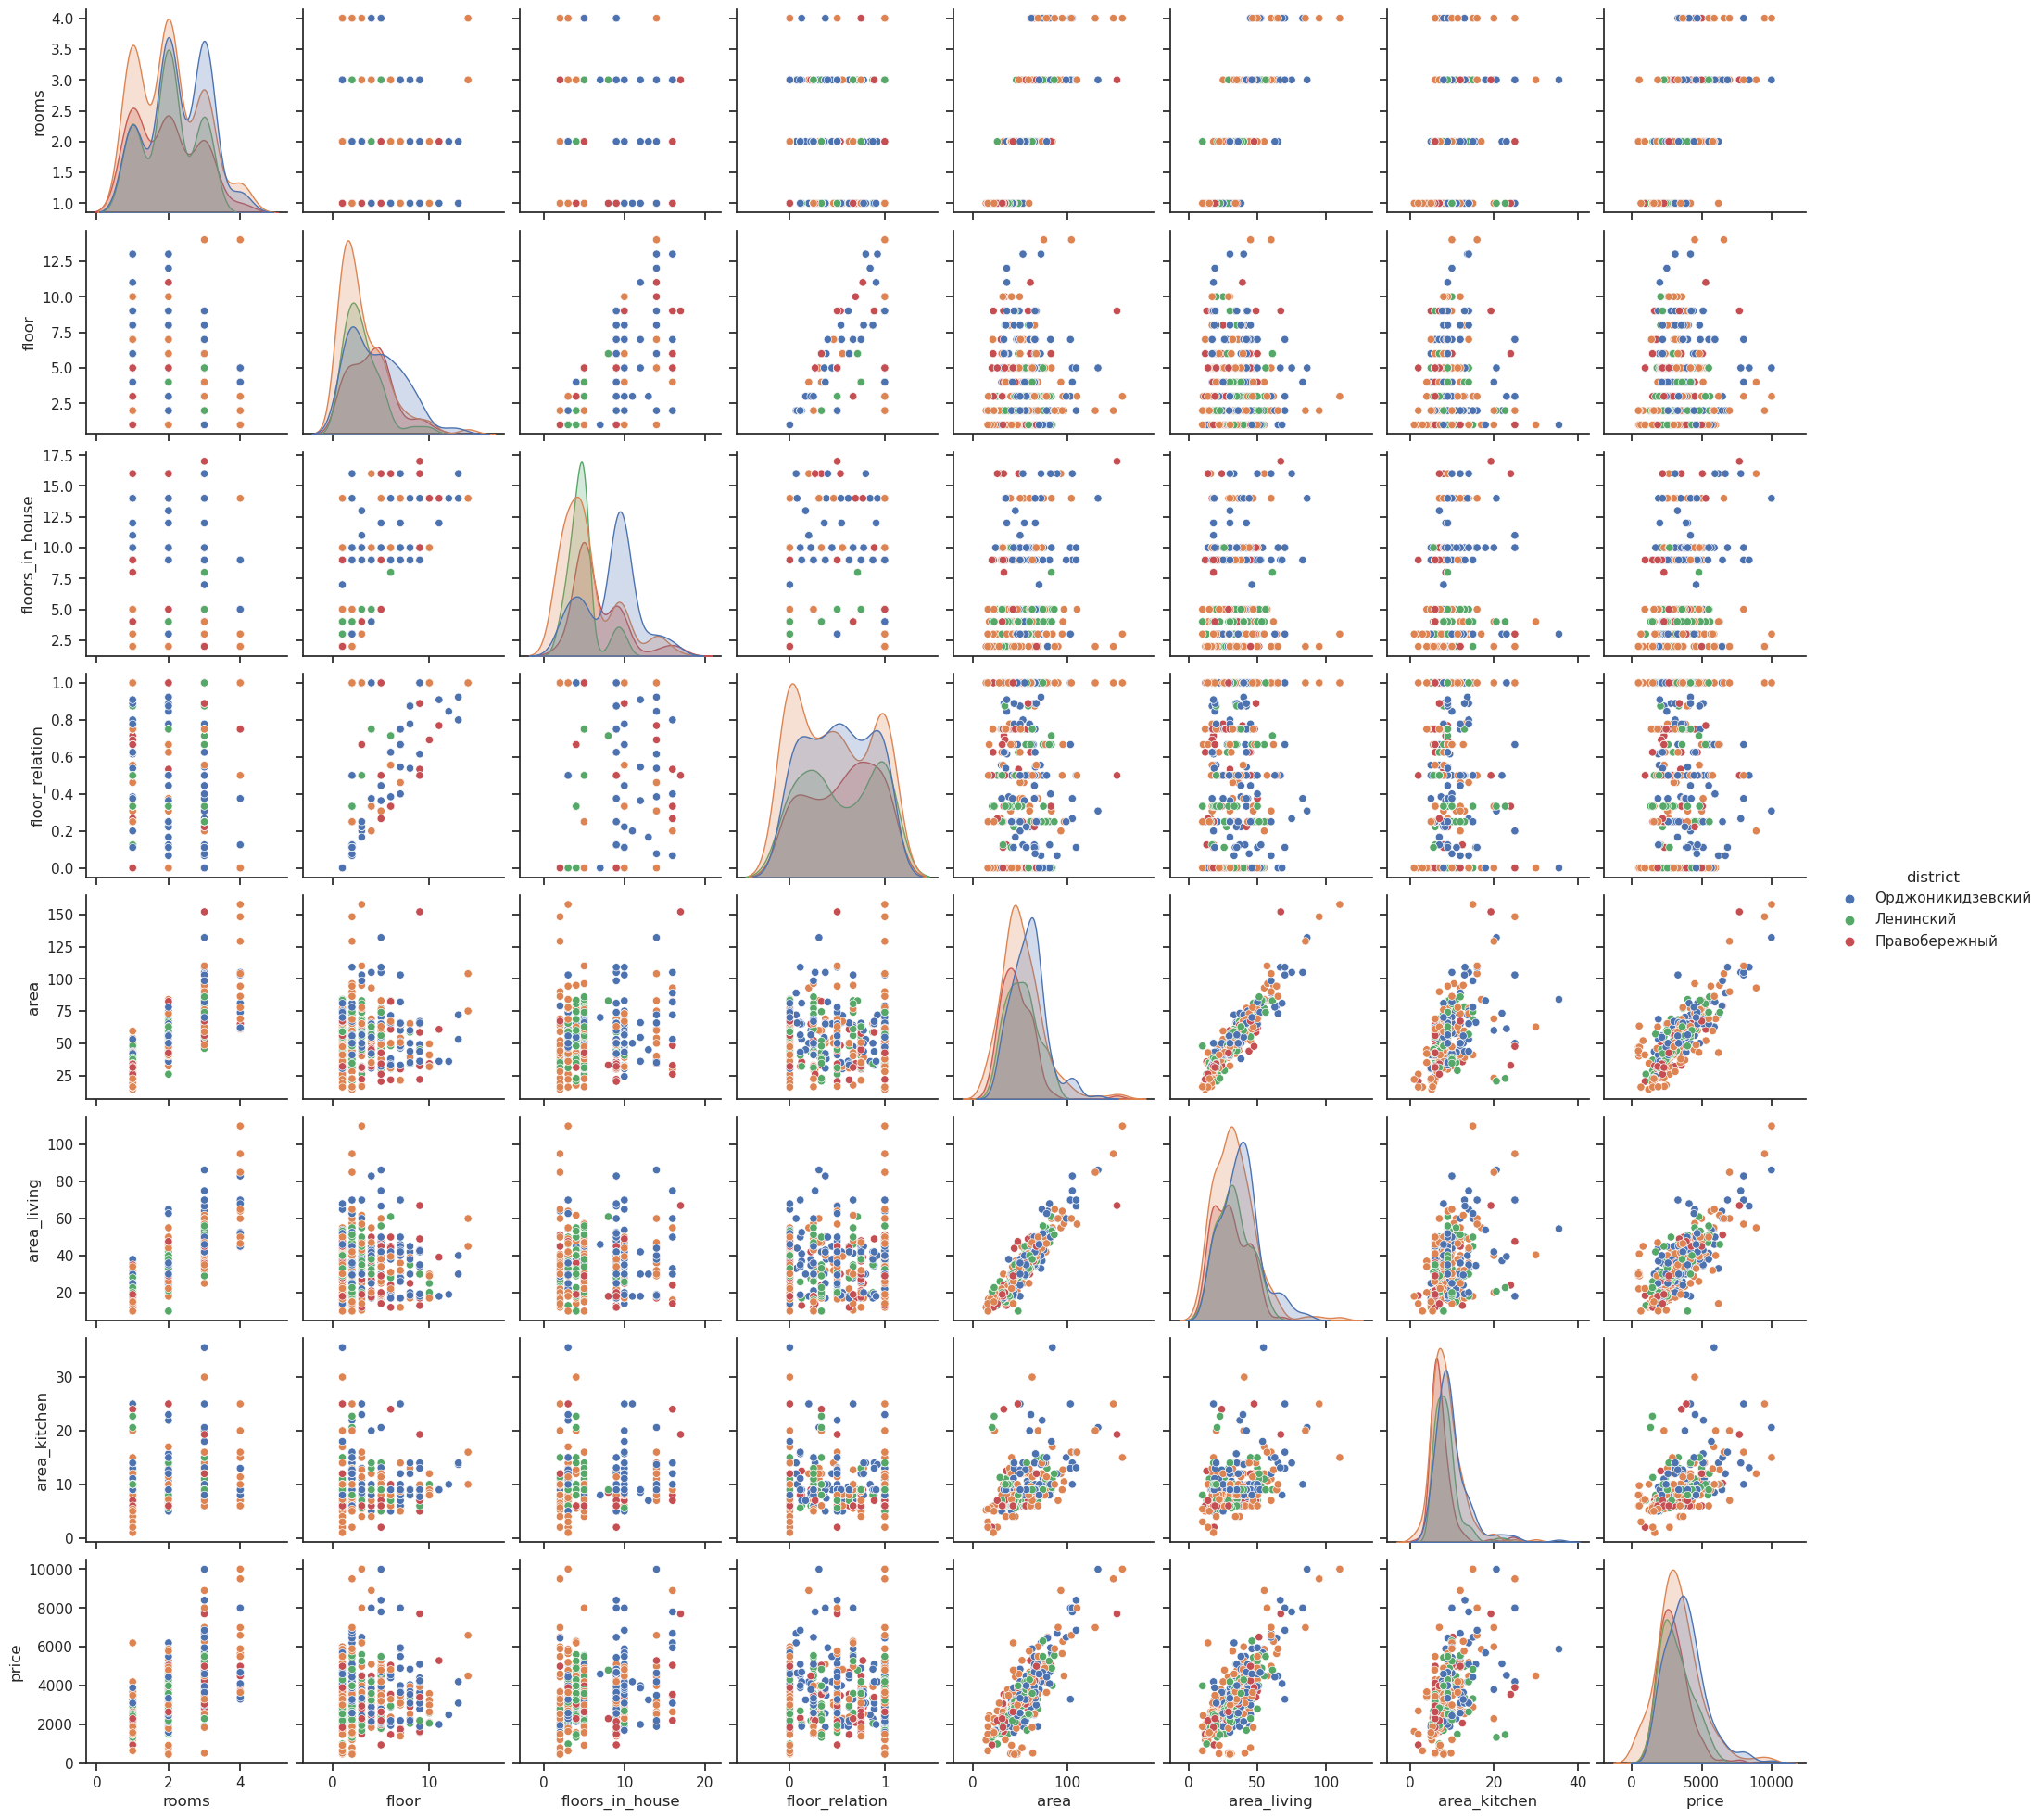

In [15]:
sns.pairplot(df[columns[1:]], hue='district')

/tmp/ipykernel_31346/3585461631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[columns[1:]].corr())


<Axes: >

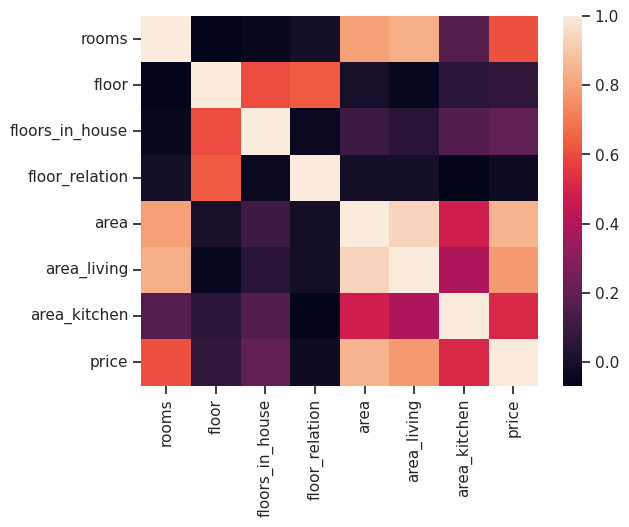

In [16]:
sns.heatmap(df[columns[1:]].corr())

# Model

In [83]:
X = df[['rooms', 'floor', 'floors_in_house', 'floor_relation', 
        'area', 'area_living', 'area_kitchen']].values
X_short = df[['floors_in_house', 'area', 'area_kitchen']].values
y = df['price'].values

## Linear regression

In [84]:
metrics = ('neg_mean_absolute_error', 'max_error')

In [85]:
lin_reg_pipe = make_pipeline(StandardScaler(), LinearRegression())

lin_reg_scores = cross_validate(lin_reg_pipe, X, y, cv=5, scoring=metrics)

## Linear regression with one-hot-encoding

In [86]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['rooms'])], remainder='passthrough')
# ohe_X = transformer.fit_transform(X)

# model = LinearRegression()
lin_reg_ohe_pipe = make_pipeline(transformer, StandardScaler(), LinearRegression())
lin_reg_ohe_scores = cross_validate(lin_reg_ohe_pipe, X, y, cv=5, scoring=metrics)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 424, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 724, in fit_transform
    self._validate_column_callables(X)
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 426, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gleb/anaconda3/envs/rest_ds/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 426, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for pandas DataFrames


## Polynomial regression

In [87]:
poly_model = PolynomialFeatures(degree=2)

poly_reg_pipe = make_pipeline(StandardScaler(), poly_model, LinearRegression())

poly_reg_scores = cross_validate(poly_reg_pipe, X, y, cv=5, scoring=metrics)

In [88]:
print(f"{'Algorithm':<25}|{'MAE':^10}|{'Max error':^10}\n"
      f"{'Linear regresssion' :<25}|{-lin_reg_scores['test_neg_mean_absolute_error'].mean() :^10.2f}|{lin_reg_scores['test_max_error'].mean() :^10.2f}\n"
      f"{'Linear regresssion + OHE' :<25}|{-lin_reg_ohe_scores['test_neg_mean_absolute_error'].mean() :^10.2f}|{lin_reg_ohe_scores['test_max_error'].mean() :^10.2f}\n"
      f"{'Polynomial regresssion' :<25}|{-poly_reg_scores['test_neg_mean_absolute_error'].mean() :^10.2f}|{poly_reg_scores['test_max_error'].mean() :^10.2f}\n"
      )

Algorithm                |   MAE    |Max error 
Linear regresssion       |  503.99  | -3112.89 
Linear regresssion + OHE |  517.02  | -3063.13 
Polynomial regresssion   |  570.52  | -3524.65 



In [93]:
lin_reg_pipe.fit(X, y)

import joblib
joblib.dump(lin_reg_pipe, 'model.joblib')

['model.joblib']

In [94]:
model_pipe = joblib.load('model.joblib')

In [127]:
i = 54
test = df.iloc[i][['rooms', 'floor', 'floors_in_house', 'floor_relation', 
        'area', 'area_living', 'area_kitchen']].values.reshape(1, -1)

model_pipe.predict(test), df.iloc[i]

(array([3695.06757989]),
 rooms                              3
 district           Орджоникидзевский
 floor                              2
 floors_in_house                    5
 floor_relation                  0.25
 area                            62.0
 area_living                     46.0
 area_kitchen                     6.0
 price                           3550
 Name: 57, dtype: object)

4, 54, 265